In [3]:
from itertools import combinations

import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('./datasets/IRIS.csv')

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


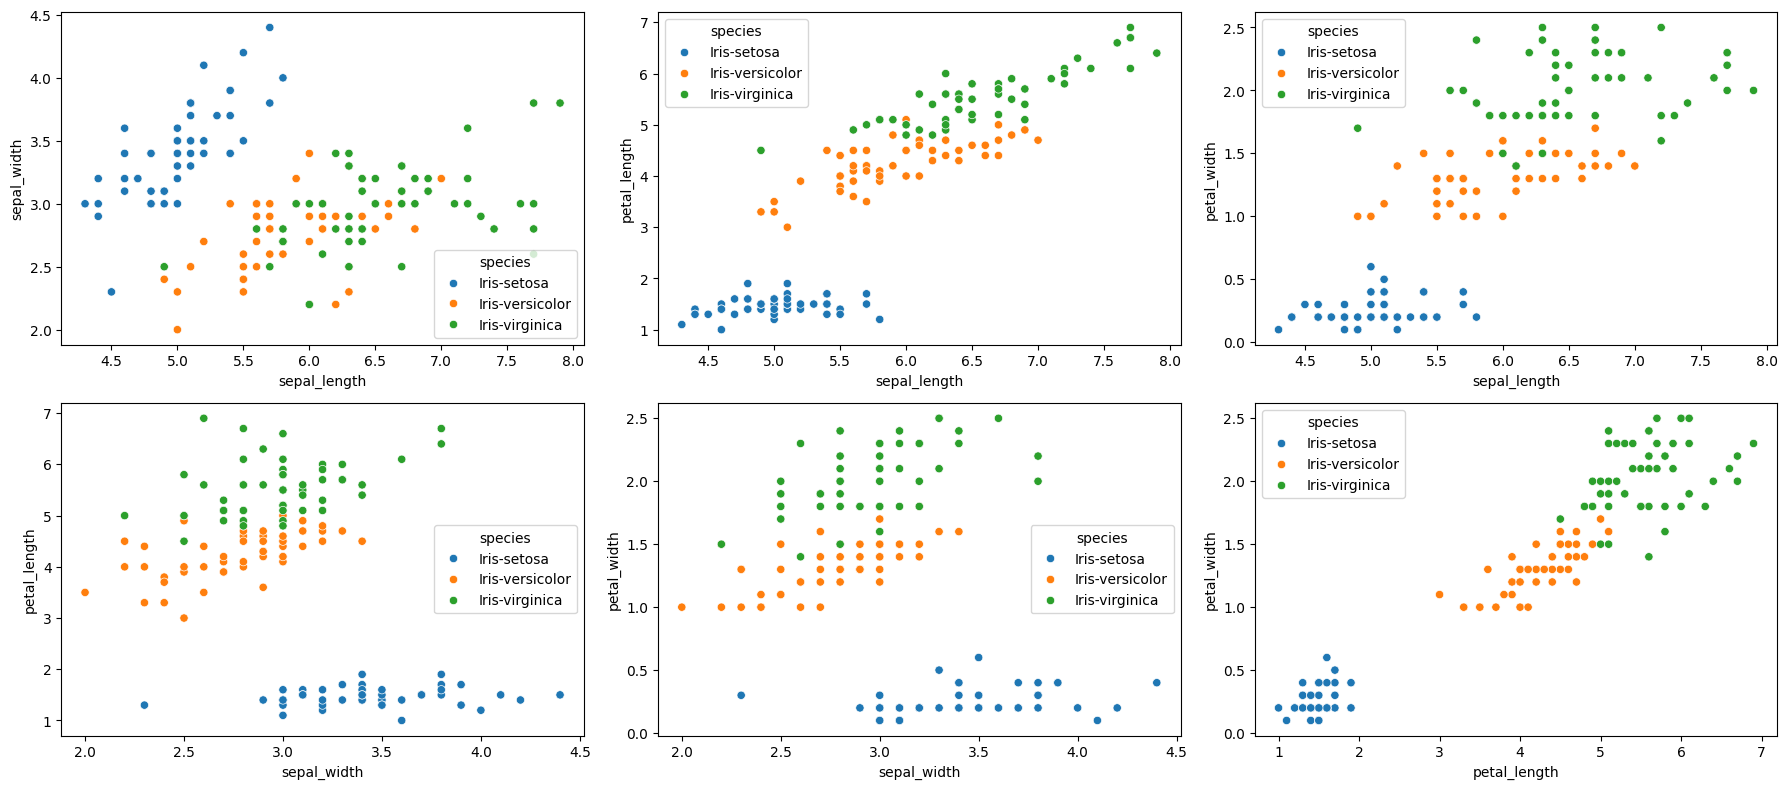

In [8]:
numeric_df = df.select_dtypes(exclude='object')
columns = list(combinations(numeric_df.columns, 2))

num_subplots = len(columns)
num_rows = int(np.sqrt(num_subplots))
num_cols = int(np.ceil(num_subplots / num_rows))
fig_size = (num_cols * 6, num_rows * 4)
plt.figure(figsize=fig_size)

for idx, column in enumerate(columns, 1):
    column_1, column_2 = column
    plt.subplot(num_rows, num_cols, idx)
    sns.scatterplot(data=df, x=column_1, y=column_2, hue='species')

plt.tight_layout()
plt.show()

In [9]:
df.pivot_table(index='species', values=numeric_df.columns, aggfunc=('mean', 'std'))

petal_length           petal_width           sepal_length  \
                        mean       std        mean       std         mean   
species                                                                     
Iris-setosa            1.464  0.173511       0.244  0.107210        5.006   
Iris-versicolor        4.260  0.469911       1.326  0.197753        5.936   
Iris-virginica         5.552  0.551895       2.026  0.274650        6.588   

                          sepal_width            
                      std        mean       std  
species                                          
Iris-setosa      0.352490       3.418  0.381024  
Iris-versicolor  0.516171       2.770  0.313798  
Iris-virginica   0.635880       2.974  0.322497

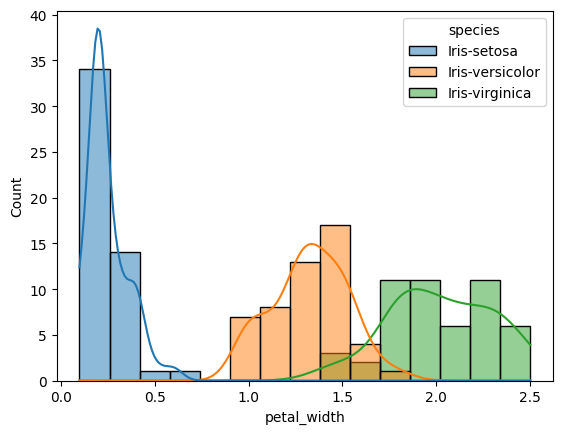

In [10]:
sns.histplot(data=df, x='petal_width', hue='species', bins=15, kde=True)

plt.show()